In [57]:
%%time
import pandas as pd

df = pd.read_csv('/tmp/train_test_small.csv')
df


CPU times: user 2.01 s, sys: 4.38 s, total: 6.39 s
Wall time: 6.43 s


,MONTH,DAY_OF_WEEK,DEP_DEL15,DISTANCE_GROUP,DEP_BLOCK,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,...,PLANE_AGE,DEPARTING_AIRPORT,LATITUDE,LONGITUDE,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND
0,1,7,0,2,MORNING,1,109,143,Southwest Airlines Co.,13056,...,8,McCarran International,36.080,-115.152,NONE,0.00,0.0,0.0,65.0,2.91
1,1,7,0,7,MORNING,1,109,191,Delta Air Lines Inc.,13056,...,3,McCarran International,36.080,-115.152,NONE,0.00,0.0,0.0,65.0,2.91
2,1,7,0,7,MORNING,1,109,199,Delta Air Lines Inc.,13056,...,18,McCarran International,36.080,-115.152,NONE,0.00,0.0,0.0,65.0,2.91
3,1,7,0,9,MORNING,1,109,180,Delta Air Lines Inc.,13056,...,2,McCarran International,36.080,-115.152,NONE,0.00,0.0,0.0,65.0,2.91
4,1,7,0,7,EARLY_MORNING,1,10,182,Spirit Air Lines,13056,...,1,McCarran International,36.080,-115.152,NONE,0.00,0.0,0.0,65.0,2.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502045,1,2,0,1,EVENING,11,6,123,Hawaiian Airlines Inc.,2092,...,18,Kahului Airport,20.901,-156.434,Honolulu International,0.01,0.0,0.0,79.0,11.86
502046,1,2,0,1,EVENING,11,6,123,Hawaiian Airlines Inc.,2092,...,18,Kahului Airport,20.901,-156.434,Honolulu International,0.01,0.0,0.0,79.0,11.86
502047,1,2,0,1,LATE_NIGHT,12,12,123,Hawaiian Airlines Inc.,2092,...,19,Kahului Airport,20.901,-156.434,Honolulu International,0.01,0.0,0.0,79.0,11.86
502048,1,2,0,1,LATE_NIGHT,13,12,123,Hawaiian Airlines Inc.,2092,...,18,Kahului Airport,20.901,-156.434,Honolulu International,0.01,0.0,0.0,79.0,11.86


In [66]:
%%time
df_delay = df[df['PRCP'] > 0]
df_delay = df_delay[df_delay['AIRLINE_FLIGHTS_MONTH'] > 1000]
df_delay = df_delay[df_delay['NUMBER_OF_SEATS'] > 100]
df_delay = df_delay[df_delay['NUMBER_OF_SEATS'] > 100]
df_delay = df_delay[df_delay['CONCURRENT_FLIGHTS'] > 5]
df_delay = df_delay[df_delay['DEP_DEL15'] == 1]
df_delay.head()

CPU times: user 91.4 ms, sys: 2.77 ms, total: 94.2 ms
Wall time: 97.4 ms


,MONTH,DAY_OF_WEEK,DEP_DEL15,DISTANCE_GROUP,DEP_BLOCK,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,...,PLANE_AGE,DEPARTING_AIRPORT,LATITUDE,LONGITUDE,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND
864,1,3,1,3,AFTERNOON,4,15,143,Southwest Airlines Co.,1561,...,15,Boise Air Terminal,43.565,-116.225,Stapleton International,0.01,0.2,0.0,43.0,6.71
1086,1,5,1,3,EVENING,2,36,142,United Air Lines Inc.,4308,...,25,Kansas City International,39.298,-94.714,Stapleton International,0.62,2.1,0.0,39.0,9.17
1091,1,5,1,4,EVENING,2,36,132,Delta Air Lines Inc.,4308,...,17,Kansas City International,39.298,-94.714,Salt Lake City International,0.62,2.1,0.0,39.0,9.17
1128,1,5,1,5,AFTERNOON,3,35,143,Southwest Airlines Co.,4308,...,13,Kansas City International,39.298,-94.714,LaGuardia,0.62,2.1,0.0,39.0,9.17
1131,1,5,1,3,EVENING,3,36,175,Southwest Airlines Co.,4308,...,3,Kansas City International,39.298,-94.714,General Mitchell Field,0.62,2.1,0.0,39.0,9.17


In [61]:
%%time

findMax = df.NUMBER_OF_SEATS.max()
findMax


CPU times: user 2.34 ms, sys: 189 µs, total: 2.53 ms
Wall time: 1.82 ms


337

In [4]:
%%time
groupBy = df.groupby("CARRIER_NAME").NUMBER_OF_SEATS.sum()
groupBy


CPU times: user 68.1 ms, sys: 7.44 ms, total: 75.5 ms
Wall time: 76.8 ms


CARRIER_NAME
Alaska Airlines Inc.             3005600
Allegiant Air                     300699
American Airlines Inc.          11834682
American Eagle Airlines Inc.     1003322
Atlantic Southeast Airlines      1021995
Comair Inc.                      1290920
Delta Air Lines Inc.            10999721
Endeavor Air Inc.                1100036
Frontier Airlines Inc.           1638222
Hawaiian Airlines Inc.            975477
JetBlue Airways                  2861057
Mesa Airlines Inc.               1086868
Midwest Airline, Inc.            1684937
SkyWest Airlines Inc.            2980314
Southwest Airlines Co.          15807529
Spirit Air Lines                 2571565
United Air Lines Inc.            7037661
Name: NUMBER_OF_SEATS, dtype: int64

In [22]:
%%time
df.groupby("CARRIER_NAME").agg({'NUMBER_OF_SEATS':['sum', 'max'],
                         'DEP_DEL15':'sum',
                         'PLANE_AGE':'mean'})


CPU times: user 76.8 ms, sys: 1.93 ms, total: 78.7 ms
Wall time: 83.1 ms


NUMBER_OF_SEATS      DEP_DEL15  PLANE_AGE
                                         sum  max       sum       mean
CARRIER_NAME                                                          
Alaska Airlines Inc.                 3005600  185      2579   8.246079
Allegiant Air                         300699  129       501  11.000000
American Airlines Inc.              11834682  304     11708  11.202736
American Eagle Airlines Inc.         1003322  129      3497  11.998697
Atlantic Southeast Airlines          1021995  129      2038  12.373071
Comair Inc.                          1290920  129      2531   9.758400
Delta Air Lines Inc.                10999721  306      9055  15.513749
Endeavor Air Inc.                    1100036  129      3133  10.515995
Frontier Airlines Inc.               1638222  230      2120   4.678322
Hawaiian Airlines Inc.                975477  294       561  14.201456
JetBlue Airways                      2861057  200      5796  11.565571
Mesa Airlines Inc.                   1086868  129      2356   9.603294
Midwest Airline, Inc.                1684937   76      4450   9.445689
SkyWest Airlines Inc.                2980314  129      9160   9.892376
Southwest Airlines Co.              15807529  175     18125  11.698691
Spirit Air Lines                     2571565  228      2015   5.717124
United Air Lines Inc.                7037661  337      8057  15.003666

In [6]:
groupBy = df.groupby("CARRIER_NAME").agg({'NUMBER_OF_SEATS':'sum',
                         'DEP_DEL15':'sum',
                         'PLANE_AGE':'mean'})

In [17]:
%%time

from sklearn.linear_model import LinearRegression

regr = LinearRegression()

X = groupBy.NUMBER_OF_SEATS.values.reshape(-1, 1)
Y = groupBy.DEP_DEL15.values.reshape(-1, 1)

# Train the model using the training sets
regr.fit(X, Y)

# Make predictions using the testing set
pred = regr.predict(X)

CPU times: user 2.01 ms, sys: 1.98 ms, total: 3.99 ms
Wall time: 3.48 ms


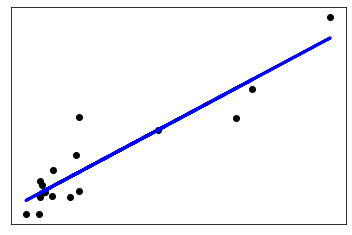

In [15]:


import matplotlib.pyplot as plt
plt.scatter(X, Y,  color='black')
plt.plot(X, pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [23]:
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import pandas as pd

In [27]:
X = df.NUMBER_OF_SEATS.values.reshape(-1, 1)
Y = df.DEP_DEL15.values.reshape(-1, 1)

In [35]:
from sklearn.model_selection import train_test_split

In [45]:
X=df[['AIRPORT_FLIGHTS_MONTH', 'NUMBER_OF_SEATS']]  # Features
y=df['DEP_DEL15']

y

0         0
1         0
2         0
3         0
4         0
         ..
502045    0
502046    0
502047    0
502048    0
502049    0
Name: DEP_DEL15, Length: 502050, dtype: int64

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [49]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [50]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8260731002888159


In [32]:
param_grid = {"C": [0.001, 0.01],
              "kernel": ['rbf', 'poly'],
              "shrinking": [True, False]}

grid_search = GridSearchCV(SVC(gamma='auto', random_state=0, probability=True),
                           param_grid=param_grid,
                           return_train_score=False,
                           cv=3,
                           n_jobs=-1)

In [33]:
grid_search.fit(X, Y)

KeyboardInterrupt: 

In [ ]:
pd.DataFrame(grid_search.cv_results_).head()